### 1. 正则化线性回归

这一部分，我们需要先对一个水库的流出水量进行正则化线性回归。然后将会探讨方差-偏差的问题

#### 1.1 数据可视化

In [1]:
import numpy as np
import scipy.io as sio
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = sio.loadmat('./ex5data1.mat')
X, y, Xval, yval, Xtest, ytest = map(np.ravel, [data['X'], data['y'], data['Xval'], data['yval'], data['Xtest'], data['ytest']])
X.shape, y.shape, Xval.shape, yval.shape, Xtest.shape, ytest.shape

((12,), (12,), (21,), (21,), (21,), (21,))

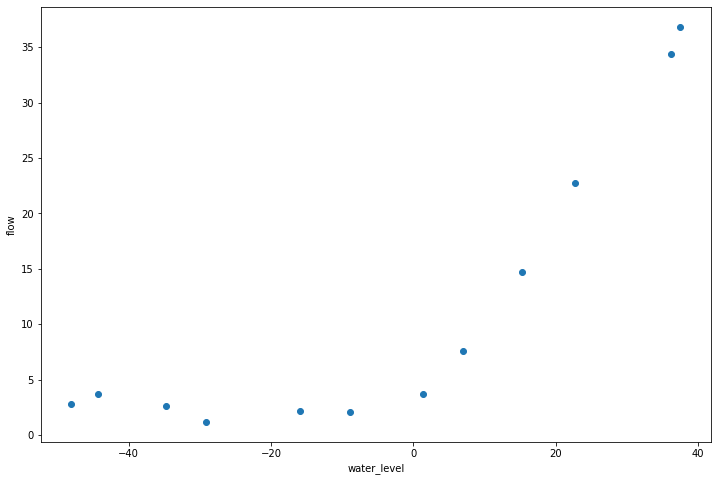

In [3]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X, y)
ax.set_xlabel('water_level')
ax.set_ylabel('flow')
plt.show()

#### 1.2 正则化线性回归代价函数

正则化线性回归代价函数公式如下：

$$
J(\theta)=\frac{1}{2m}(\sum^{m}_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})^2)+\frac{\lambda}{2m}(\sum^{n}_{j=1}\theta^2_j)
$$

其中$\theta$是正则化参数，它控制了正则化的速度。正则化项在原来的代价J上加了一个惩罚项。随着参数$\theta_j$的变大，惩罚项也会增大。另外不需要正则化$\theta_0$

下面完成计算正则化线性回归代价函数的代码。theta初始值为\[1, 1]，输出应该为303.993

In [17]:
X, Xval, Xtest = [np.insert(x.reshape(x.shape[0], 1), 0, np.ones(x.shape[0]), axis=1) for x in (X, Xval, Xtest)]

In [4]:
def cost(theta, X, y):
    m = X.shape[0]
    inner = X @ theta - y
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)
    return cost

In [5]:
def costReg(theta, X, y, reg=1):
    m = X.shape[0]
    regularized_term = (reg / (2 * m)) * np.power(theta[1:], 2).sum()
    return cost(theta, X, y) + regularized_term

In [19]:
theta = np.ones(X.shape[1])
costReg(theta, X, y, 1)

303.9931922202643

#### 1.3 正则化线性回归的梯度

$$
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum^{m}_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}_j ,\space\space\space for \space\space j = 0
$$
$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum^{m}_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}_j + \frac{\lambda}{m} \theta_j, \space\space\space for \space\space j \geq 0
$$

设定\theta初始值为\[1, 1]，输出应该为\[-15.30, 598.250]

In [ ]:
def gredient(theta, X, y):
    m = X.shape[0]
    inner = X.T @ (X @ theta - y)
    return inner / n